# DYNAMIC GRAPH REPRESENTATION LEARNING VIA SELF-ATTENTION NETWORKS

本文提出：动态自注意力网络（Dynamic Self-Attention Network，简称 DySAT）

在structural neighborhood and temporal dynamics 两个方面引入自注意力


在两类图上进行了链接预测实验：communication networks and bipartite rating networks。

**Bipartite Rating Networks（二部评分网络）** 是一种特殊类型的图结构，广泛用于建模用户和物品之间的交互关系，特别常见于推荐系统中（如电影、商品、书籍等推荐）。

二部图其节点集可以划分为两个不相交的子集 $U$ 和 $V$，图中的每条边都只连接一个来自 $U$ 的节点和一个来自 $V$ 的节点，**不会有两个属于同一子集的节点之间存在边**。

在评分网络中：

* $U$ 通常代表 **用户（Users）**
* $V$ 通常代表 **物品（Items）**
* 边表示用户对某个物品有过 **评分、点击、购买、观看等行为**
* 边的权重可能表示 **评分值**（如 1-5 星）


| 特点          | 说明                        |
| ----------- | ------------------------- |
| **异质性**     | 节点类型异构（用户 vs 物品）          |
| **稀疏性**     | 大多数用户只与少数物品交互，形成稀疏连接      |
| **动态性**     | 用户评分行为随时间不断发生，网络结构随时间演变   |
| **带权边**     | 边常包含评分值或时间戳，增加了网络的复杂性     |
| **可用于推荐系统** | 是许多推荐模型（如协同过滤、图神经网络）的建模基础 |


常用于研究的 bipartite rating networks 数据集包括：

* **MovieLens**（用户–电影评分）
* **Amazon Reviews**（用户–商品评分）
* **Yelp**（用户–商户评论）



引言

1. 研究的是图嵌入

2. 以往关于图表示学习的研究主要集中于静态图， 本文史研究动态的

3. 动态图通常被表示为一系列不同时间步的图快照

4. 当输入序列同时作为上下文和被关注对象时，该机制称为自注意力（self-attention）。

本文观点：

动态图通常包含周期性模式，例如重复出现的链接或社区结构

在两个维度上采用自注意力机制：结构邻居维度和时间动态维度，即 DySAT 通过考虑节点的邻居以及其历史表示，采用自注意力方式生成其动态表示。

静态图嵌入

依赖于图的谱属性（如拉普拉斯矩阵），图矩阵的降维获得节点的低维表示

图神经网络引入了图卷积思想用于监督或半监督的学习任务

图卷积适用于无监督学习。

动态图嵌入

时间平滑正则项？？？

三元闭包

连续时间图与本文中基于离散时间快照的动态图不同

本文通过时间演化信息提高嵌入质量。本研究与现有工作最大的区别是：通过自注意力机制自动学习节点在时间维度上最相关的历史表示，提升动态表示能力。

在 DySAT 中，将自注意力扩展到两个维度：

节点的邻居（结构注意力）

节点自身的历史状态（时间注意力）

与 图注意力网络（GAT）的思想有关，后者在静态图上取得了良好的节点分类效果



##  3 PROBLEM DEFINITION

明确了要解决的问题：


### 动态图定义

将动态图表示为一个**时间序列图快照**的集合：

$$
\mathcal{G} = \{G_1, G_2, \ldots, G_T\}
$$

* 每个快照 $G_t = (V, E_t)$：

  * $V$：固定的节点集合（所有时间共享）
  * $E_t$：第 t 个时间步的边集合
  * $A_t$：对应的邻接矩阵（加权，无向图）

本文允许**边的出现和消失**，更贴近现实动态网络。


### 动态表示学习目标

目标是在每个时间步 $t$，为每个节点 $v \in V$ 学习一个嵌入表示：

$$
\mathbf{e}_v^t \in \mathbb{R}^d
$$

嵌入不仅要在某一时刻表达结构信息，还要反映其在历史时间维度的变化趋势。


| 特点   | 描述                    |
| ---- | --------------------- |
| 输入   | 一系列动态图快照（可加可减边）       |
| 目标   | 为每个节点在每个时间步学习动态表示     |
| 核心方法 | 利用结构注意力 + 时间注意力进行表示学习 |
| 应用任务 | 链接预测（实验部分）            |


## 动态自注意力网络

两个创新性的关键组件构成：结构自注意力层（structural self-attention layer）和时间自注意力层（temporal self-attention layer）。

一个结构块（structural block），后接一个时间块（temporal block）

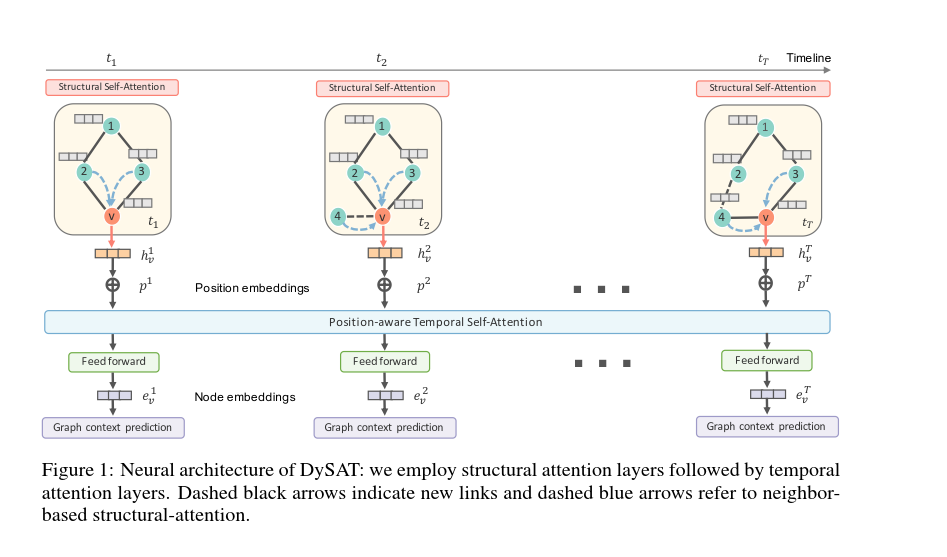

每个时间步：
   图结构 + 邻居注意力  →  结构嵌入 h_v^t

所有时间步：
   [h_v^1, ..., h_v^T] + 时间位置编码 → 时间注意力聚合 → 动态表示 e_v^t
   
---

结构块（Structural Block）

- 该模块通过自注意力的方式对局部邻居进行聚合，从而提取节点在每个快照中的结构特征，生成中间节点表示。

时间块（Temporal Block）

- 接收结构块输出的中间表示，并通过时间维度上的自注意力机制，在多个时间步之间建模，捕捉图结构的时间变化模式。

## 4.1 结构自注意力（Structural Self-Attention）

### 目标

学习当前时间快照中每个节点的结构性表示，从邻居中聚合信息。

### 输入

* 图快照 $\mathcal{G} \in \mathbb{G}$
* 节点初始表示 $\{ x_v \in \mathbb{R}^D, \forall v \in \mathcal{V} \}$

  * 可用 one-hot 编码或属性向量初始化

### 输出

* 节点的新表示 $\{ z_v \in \mathbb{R}^F, \forall v \in \mathcal{V} \}$，具有局部结构表达能力


输入与输出的维度不一样


### 公式

对 Graph Attention Network（GAT）机制的拓展，应用在单个快照图上：

$$
z_v = \sigma\left(\sum_{u \in \mathcal{N}_v} \alpha_{uv} W^s x_u\right)
$$

解释：通过线性变换  $ W^s $把原始维度 𝐷 投影到了新维度 𝐹，然后再通过注意力聚合邻居

注意力权重计算公式，用于衡量邻居节点对目标节点的影响力大：

$$
\alpha_{uv} = \frac{\exp \left( \sigma\left( A_{uv} \cdot a^\top [W^s x_u \| W^s x_v] \right) \right)}{\sum_{w \in \mathcal{N}_v} \exp \left( \sigma\left( A_{wv} \cdot a^\top [W^s x_w \| W^s x_v] \right) \right)}
$$


### 符号含义

| 符号                                | 含义                       |
| --------------------------------- | ------------------------ |
| $\mathcal{N}_v$                   | 节点 $v$ 的邻居集合             |
| $A_{uv}$                          | 边 $(u, v)$ 的权重（若无权图则为 1） |
| $W^s \in \mathbb{R}^{D \times F}$ | 节点表示的线性变换矩阵              |
| $a \in \mathbb{R}^{2F}$           | 注意力权重向量（前馈网络）            |
| $\|$                              | 向量拼接操作                   |
| $\sigma$                          | 非线性激活函数，如 LeakyReLU      |
| $z_v$                             | 节点 $v$ 的结构性表示            |
| 部分                               | 含义                                       |
| $x_u, x_v$                       | 节点 $u$、$v$ 的输入表示（维度 $D$）                 |
| $W^s x$                          | 线性变换（投影到维度 $F$）后的表示                      |
| $[W^s x_u \| W^s x_v]$           | 将节点 $u$ 和节点 $v$ 的表示向量拼接，表示它们的关系          |
| $a^\top$                         | 一个可学习的注意力向量（前馈神经元），将拼接后的向量投影为一个标量“相关性分数” |
| $\sigma$                         | 非线性激活函数，如 LeakyReLU                      |
| $A_{uv}$                         | 边的权重（无权图中通常为 1）——用于强调某些边的强度              |
| $\exp(\cdot) / \sum \exp(\cdot)$ | softmax 操作，使所有邻居的权重归一化，方便加权聚合            |

**本质上是：** 每个节点对其邻居赋予不同的注意力权重，从中聚合信息。



---

## 时间自注意力（Temporal Self-Attention）

建模单个节点随时间的演化趋势，捕捉不同时刻的节点表示之间的依赖关系。

### 输入

* 节点 $v$ 在 $T$ 个时间步的表示序列：

  $$
  \{x_v^1, x_v^2, ..., x_v^T\},\quad x_v^t \in \mathbb{R}^{D'}
  $$

  即结构层输出的结果。

* 拼接成矩阵形式 $X_v \in \mathbb{R}^{T \times D'}$

### 输出

* 同样维度的时间增强表示矩阵 $Z_v \in \mathbb{R}^{T \times F'}$

---




### 自注意力机制

使用的是 **Scaled Dot-Product Attention**（Vaswani et al., 2017）：

$$
Z_v = \beta_v(X_v W_v)
$$

其中注意力权重矩阵：

$$
\beta_v^{ij} = \frac{\exp(e_v^{ij})}{\sum_{k=1}^{T} \exp(e_v^{ik})},\quad
e_v^{ij} = \frac{((X_v W_q)(X_v W_k)^\top)_{ij}}{\sqrt{F'}} + M_{ij}
$$


掩码定义如下：

$$
M_{ij} = \begin{cases}
0, & i \leq j \quad \text{（可关注当前及过去）} \\
-\infty, & i > j \quad \text{（禁止关注未来）}
\end{cases}
$$

这样设计可以防止未来信息影响当前节点的表示，保证自回归性质。

---

###  输入矩阵：

$$
X_v = 
\begin{bmatrix}
h_v^1 \\
h_v^2 \\
\vdots \\
h_v^T
\end{bmatrix} \in \mathbb{R}^{T \times D'}
$$

是节点 $v$ 在所有时间的结构表示（来自结构注意力层）。

---

### 步骤 1：线性映射成 Q、K、V

$$
Q = X_v W_q,\quad K = X_v W_k,\quad V = X_v W_v
$$

得到：

* 查询矩阵 $Q \in \mathbb{R}^{T \times F'}$
* 键矩阵 $K \in \mathbb{R}^{T \times F'}$
* 值矩阵 $V \in \mathbb{R}^{T \times F'}$

---

### 步骤 2：计算注意力权重矩阵

$$
e_{ij} = \frac{Q_i \cdot K_j^\top}{\sqrt{F'}} + M_{ij}
$$

* 这表示：时间步 $i$ 对时间步 $j$ 的关注程度（打分）
* 加了一个 **掩码矩阵 $M$**，防止信息“泄露未来”（$i > j$ 时为 $-\infty$，强制 softmax 得到 0）


 F'是维度，防止点积结果过大，影响 softmax 的梯度稳定性。

---

### 步骤 3：softmax 归一化注意力分数

$$
\beta_{ij} = \frac{ \exp(e_{ij}) }{ \sum_{k=1}^T \exp(e_{ik}) }
$$

得到每一行是一个时间步对之前所有时间步的“注意力分布”

---

### 步骤 4：注意力加权聚合值

$$
Z_v = \beta_v \cdot V
$$

* 输出的 $Z_v \in \mathbb{R}^{T \times F'}$
* 表示节点 $v$ 在每个时间步的最终动态表示 $z_v^t$

---


得到了节点 $v$ 在每个时间步 $t$ 的最终动态表示 $z_v^t$，它：

* 同时编码了结构信息（来自结构层）
* 又捕捉了时间演化规律（来自历史表示之间的注意力聚合）



> 第 4.2 节时间自注意力层就是对每个节点自己的**历史结构表示 $h_v^1, ..., h_v^t$** 做**自注意力聚合**，让当前时刻的嵌入能考虑到历史行为演化，输出最终动态嵌入 $z_v^t$。




### 1. **结构多头注意力**（Structural Multi-Head Attention）

**每个图快照（时间步）上，节点聚合邻居信息时使用多头注意力：**

$$
h_v = \text{Concat}(z_v^1, z_v^2, ..., z_v^H) \quad \forall v \in V \tag{3}
$$

* $H$：头数（如 4、8）
* 每个 $z_v^i \in \mathbb{R}^{F_i}$：第 $i$ 个头的输出（邻居聚合表示）
* 拼接所有头的结果作为节点在该时间步的结构表示 $h_v \in \mathbb{R}^F$

每个头都用一个独立的参数

---

### 2. **时间多头注意力**（Temporal Multi-Head Attention）

**对一个节点 $v$ 的时间演化序列做多头注意力：**

$$
H_v = \text{Concat}(Z_v^1, Z_v^2, ..., Z_v^H) \quad \forall v \in V \tag{4}
$$

* 每个 $Z_v^i \in \mathbb{R}^{T \times F'_i}$：第 $i$ 个注意力头对时间序列的输出
* 最终拼接后得到 $H_v \in \mathbb{R}^{T \times F'}$，即节点 $v$ 在所有时间步的最终嵌入序列

---

## 图示类比：

```
                    多头注意力
                        ↓
     ┌─────────────┬─────────────┬─────────────┐
Head 1 输出 (结构/时间)   Head 2 输出       Head 3 ...
     └─────────────┴─────────────┴─────────────┘
              ↓ Concat 拼接所有输出
         得到结构表示 h_v 或时间表示 H_v
```


| 类型                    | 用在哪儿     | 输入                   | 输出                                 | 特点            |
| --------------------- | -------- | -------------------- | ---------------------------------- | ------------- |
| Structural Multi-Head | 每个时间的图快照 | 节点邻居                 | $h_v \in \mathbb{R}^F$             | 不同头关注不同邻居特征组合 |
| Temporal Multi-Head   | 节点的历史序列  | $h_v^1 \ldots h_v^T$ | $H_v \in \mathbb{R}^{T \times F'}$ | 不同头关注不同时间依赖模式 |



DySAT 模型的整体架构

由三大模块构成（参考 Figure 1，从上到下）：

```
1. Structural Attention Block（结构注意力模块）
2. Temporal Attention Block（时间注意力模块）
3. Graph Context Prediction（图上下文预测）
```

它的输入是：**T 个时间步的图快照序列 $\{G_1, ..., G_T\}$**
输出是：**每个时间步上每个节点的动态表示 $\{e_v^1, ..., e_v^T\}$**

---

## 1. Structural Attention Block

提取每个节点在**每个时间快照**上的局部图结构信息。

实现方式：

* 对每个图快照 $G_t$ 独立地应用结构自注意力层；
* 所有时间步 **共享参数**；
* 头是独立的

输出是每个节点在每个时间步的结构表示：

$$
\{h_v^1, h_v^2, ..., h_v^T\},\quad h_v^t \in \mathbb{R}^f
$$


## 2. Temporal Attention Block

建模每个节点在多个时间步之间的**演化模式（时间依赖）**。

步骤：

添加位置编码（Position Embedding）：

$$
p_1, ..., p_T \in \mathbb{R}^f
$$

* 用于表达每个时间步的绝对位置（否则时间是无序的）
* 和结构嵌入相加：

  $$
  h_v^t + p_t
  $$

输入给堆叠的时间自注意力层：

* 多层 Temporal Self-Attention，用于学习历史依赖
* 输出每个节点在每个时间步的最终动态表示

通过 position-wise 前馈网络输出最终嵌入：

$$
\{e_v^1, e_v^2, ..., e_v^T\}
$$

---

## 3. Graph Context Prediction

训练目标函数，**让相似的节点嵌入靠近**（即节点嵌入能捕捉结构和时间上下文）


### 损失函数（核心是基于随机游走的 Skip-gram 思想）

目标：

> 节点 $v$ 在第 $t$ 个时间步的嵌入 $e_v^t$，能够预测**它在随机游走中遇到的节点**（邻居）：

$$
\mathcal{L}_v = \sum_{t=1}^T \sum_{u \in N_{\text{walk}}(v)} 
- \log \sigma(\langle e_u^t, e_v^t \rangle)
- w_n \sum_{u' \in P_{\text{neg}}(v)} \log (1 - \sigma(\langle e_{u'}^t, e_v^t \rangle))
$$


首先第一项 $\langle e_u^t, e_v^t \rangle$ 是计算这两个node的相似度，内积越大越相似,$\sigma$ 是sacle一下到0，1之间，那么越相似越接近于1，log→0，这个会接近于0，然后取- $\log$ 会得到一个正的值也就是越相似第一项越小

第二项	负样本和目标节点越不相似越好	相似度低，σ→0，log(1−σ)→0，损失小



---

各个符号含义：

| 符号                             | 含义                                    |
| ------------------------------ | ------------------------------------- |
| $\sigma$                       | sigmoid 函数，用于二分类概率输出                  |
| $\langle \cdot, \cdot \rangle$ | 向量内积，衡量节点之间的相似性                       |
| $N_{\text{walk}}(v)$           | 在快照 $t$ 中与节点 $v$ 在随机游走中同时出现的节点集合（正样本） |
| $P_{\text{neg}}(v)$            | 负采样节点集合（从图中随机采样）                      |
| $w_n$                          | 负样本比重超参数，用于平衡正负样本数目                   |

---

损失函数的目标：

* **最大化**正样本节点之间的相似度（共同出现）
* **最小化**负样本与目标节点之间的相似度（不相关）



很关键的是正负样本怎么来的？


正样本集，$N_{\text{walk}}(v)$ 是固定长度随机游走中出现的邻居

$P_{\text{neg}}(v)$ 从图 𝐺𝑡 中对所有节点按某个负采样分布采样出来的节点集合，且这些节点与 𝑣 没有共现关系

下面实际上是Feature extraction的部分

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class StructuralAttentionLayer_f(nn.Module):
# 这不是真正意义上的“图注意力”，而是普通 self-attention，不能区分结构连接。因为adj 没被用上。
    def __init__(self, input_dim, output_dim, num_heads, dropout):
        super(StructuralAttentionLayer_f, self).__init__()
        # 首先ModuleList的用法在于自动注册所有子模块，PyTorch 能正确追踪它们。
        self.attn_heads = nn.ModuleList([
            nn.MultiheadAttention(embed_dim=output_dim, num_heads=1, dropout=dropout)
            for _ in range(num_heads)
            # 用 num_heads 个 单头（1-head）注意力模块，每个独立执行一次 attention，最后手动融合。
            # 速度会很慢而且无法并行但是可以做不同操作
            # 每个 head 是独立的 MHA
            # 我不理解为什么不用多头？？？
        ])
        # self.attn = nn.MultiheadAttention(embed_dim=output_dim, num_heads=num_heads, dropout=dropout)
        # 多头的写法如上
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x, adj):
        x = self.linear(x) # 线性映射
        out = []
        for attn in self.attn_heads:
            attn_output, _ = attn(x, x, x, key_padding_mask=None)
            out.append(attn_output)

        # 把所有 head 输出的 [N, F] 堆叠成一个 [H, N, F]
        # 然后对 head 维度取平均，得到最终输出 [N, F]
        h = torch.mean(torch.stack(out), dim=0)
        return h


class StructuralAttentionLayer(nn.Module):
    def __init__(self, input_dim, output_dim, num_heads, dropout):
        super(StructuralAttentionLayer, self).__init__()
        # 直接使用多头
        self.attn = nn.MultiheadAttention(embed_dim=output_dim, num_heads=num_heads, dropout=dropout, batch_first=True)
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x, adj):
        """
        x: [N, F]
        adj: [N, N] adjacency matrix (dense or sparse, 0/1 entries)
        """
        x = self.linear(x)                # [N, F] N个节点，每个有F维特征，把输入特征维度从 F_in → F_out
        x = x.unsqueeze(0)                # Add batch dimension: [1, N, F]，加入 batch 维度

        # 构造 attention mask：非邻接元素为 -inf，邻接或对角线为 0
        # attn_mask shape: [N, N]
        attn_mask = (adj == 0).float() * (-1e9)  # 非连接的设置为一个非常小的数（-inf）

        # MultiheadAttention (batch_first=True): query/key/value should be [B, N, F]
        attn_output, _ = self.attn(x, x, x, attn_mask=attn_mask)
        return attn_output.squeeze(0)  # [N, F]


'''
输入 x:           [N, F_in]
↓ Linear 映射
x:                [N, F_out]
↓ unsqueeze(0)
x:                [1, N, F_out]
↓ attn_mask:      [N, N] 屏蔽非邻居
↓ MultiheadAttention
输出 attn_output: [1, N, F_out]
↓ squeeze(0)
最终输出：        [N, F_out]

'''


class TemporalAttentionLayer(nn.Module):
#  时间维度注意力机制
    def __init__(self, input_dim, num_heads, dropout):
        super(TemporalAttentionLayer, self).__init__()
        self.attn = nn.MultiheadAttention(embed_dim=input_dim, num_heads=num_heads, dropout=dropout)
        self.pos_emb = nn.Parameter(torch.randn(1, 100, input_dim))  # 100 max timesteps, Positional Embedding shape: [1, max_T, F]

    def forward(self, x):  # x: [N, T, F]
        N, T, F = x.size()
        x = x + self.pos_emb[:, :T, :] # 加入时间维度
        x = x.permute(1, 0, 2)  # [T, N, F]
        attn_out, _ = self.attn(x, x, x) # 注意力计算，自注意力：query = key = value = x
        return attn_out.permute(1, 0, 2)  # [N, T, F]， 转化成原始shape


class DySAT(nn.Module):
    def __init__(self, input_dim, struct_hidden_dim, temp_hidden_dim, num_heads_struct, num_heads_temp, num_timesteps, dropout=0.2):
        super(DySAT, self).__init__()
        self.num_timesteps = num_timesteps
        self.struct_layers = nn.ModuleList([
            StructuralAttentionLayer(input_dim, struct_hidden_dim, num_heads_struct, dropout)
        ])
        self.temp_layer = TemporalAttentionLayer(struct_hidden_dim, num_heads_temp, dropout)

    def forward(self, x_list, adj_list):
        # x_list: list of [N, F] at each time t
        # adj_list: list of [N, N] sparse or dense adjacencies
        struct_outputs = []
        
        #结构注意力部分（每个 snapshot）
        for t in range(self.num_timesteps):
            x = x_list[t]
            adj = adj_list[t]
            h = x
            for layer in self.struct_layers:
                h = layer(h, adj)
            struct_outputs.append(h)

        # 堆叠结构输出 → 构造时间序列输入
        struct_outputs = torch.stack(struct_outputs, dim=1)  # [N, T, F]
        #  时间注意力部分
        final_embeddings = self.temp_layer(struct_outputs)  # [N, T, F]
        return final_embeddings


Binary Cross Entropy

In [ ]:
def context_loss(node_embs_t, pos_pairs, neg_pairs, neg_weight=1.0):
    """
    node_embs_t: [N, F] for a specific timestep
    pos_pairs: list of (u,v) positive node index pairs
    neg_pairs: list of (u,v) negative node index pairs
    """
    pos_u = node_embs_t[[u for u, v in pos_pairs]]
    pos_v = node_embs_t[[v for u, v in pos_pairs]]
    neg_u = node_embs_t[[u for u, v in neg_pairs]]
    neg_v = node_embs_t[[v for u, v in neg_pairs]]

    pos_score = torch.sum(pos_u * pos_v, dim=1)
    neg_score = torch.sum(neg_u * neg_v, dim=1)

    pos_loss = F.binary_cross_entropy_with_logits(pos_score, torch.ones_like(pos_score))
    neg_loss = F.binary_cross_entropy_with_logits(neg_score, torch.zeros_like(neg_score))

    return pos_loss + neg_weight * neg_loss


In [ ]:
# 假设我们有 num_timesteps 个 snapshot，每个 snapshot 有 N 个节点，F 维特征
x_list = [torch.randn(N, F_in) for _ in range(T)]
adj_list = [torch.eye(N) for _ in range(T)]  # 假设简单的单位图

model = DySAT(input_dim=F_in, struct_hidden_dim=64, temp_hidden_dim=64,
              num_heads_struct=2, num_heads_temp=2, num_timesteps=T)

embs = model(x_list, adj_list)  # 输出 [N, T, F]

# 损失计算（以 T-1 时刻为例）
loss = context_loss(embs[:, -1, :], pos_pairs, neg_pairs)
loss.backward()


结构自注意力应该基于的是GAT

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class StructuralAttentionLayer(nn.Module):
    def __init__(self, input_dim, output_dim, num_heads, dropout):
        super().__init__()
        self.num_heads = num_heads
        self.output_dim = output_dim // num_heads

        self.linear_proj = nn.Linear(input_dim, output_dim, bias=False)
        self.attn_fc = nn.Parameter(torch.Tensor(num_heads, 2 * self.output_dim))
        self.dropout = nn.Dropout(dropout)
        self.leaky_relu = nn.LeakyReLU(0.2)

        nn.init.xavier_uniform_(self.linear_proj.weight)
        nn.init.xavier_uniform_(self.attn_fc)

    def forward(self, h, adj):
        N = h.size(0)
        h_proj = self.linear_proj(h)  # [N, output_dim]
        h_proj = h_proj.view(N, self.num_heads, self.output_dim)  # [N, num_heads, output_dim]

        # Prepare attention mechanism input
        h_repeat_i = h_proj.unsqueeze(1).repeat(1, N, 1, 1)  # [N, N, num_heads, output_dim]
        h_repeat_j = h_proj.unsqueeze(0).repeat(N, 1, 1, 1)  # [N, N, num_heads, output_dim]

        # Concatenate for attention calculation
        concat_h = torch.cat([h_repeat_i, h_repeat_j], dim=-1)  # [N, N, num_heads, 2 * output_dim]

        # Compute attention scores
        e = self.leaky_relu((concat_h * self.attn_fc).sum(dim=-1))  # [N, N, num_heads]

        # Mask attention scores with adjacency
        mask = (adj == 0)
        e.masked_fill_(mask.unsqueeze(-1), float('-inf'))

        # Compute attention weights
        alpha = F.softmax(e, dim=1)  # [N, N, num_heads]
        alpha = self.dropout(alpha)

        # Compute attended node features
        h_attn = torch.einsum('ijh,jhf->ihf', alpha, h_proj)  # [N, num_heads, output_dim]
        h_attn = h_attn.reshape(N, -1)  # [N, output_dim]

        return h_attn
        
class DySAT(nn.Module):
    def __init__(self, input_dim, struct_hidden_dim, num_heads_struct,
                 num_heads_temp, num_timesteps, dropout=0.2):
        super(DySAT, self).__init__()
        self.num_timesteps = num_timesteps

        self.struct_layer = StructuralAttentionLayer(
            input_dim=input_dim,
            output_dim=struct_hidden_dim,
            num_heads=num_heads_struct,
            dropout=dropout
        )

        self.temp_layer = TemporalAttentionLayer(
            input_dim=struct_hidden_dim,
            num_heads=num_heads_temp,
            dropout=dropout
        )

    def forward(self, x_list, adj_list):
        struct_outputs = []
        for t in range(self.num_timesteps):
            x = x_list[t]
            adj = adj_list[t]
            h = self.struct_layer(x, adj)
            struct_outputs.append(h)

        struct_outputs = torch.stack(struct_outputs, dim=1)  # [N, T, F]
        final_embs = self.temp_layer(struct_outputs)         # [N, T, F]

        return final_embs


class TemporalAttentionLayer(nn.Module):
#  时间维度注意力机制
    def __init__(self, input_dim, num_heads, dropout):
        super(TemporalAttentionLayer, self).__init__()
        self.attn = nn.MultiheadAttention(embed_dim=input_dim, num_heads=num_heads, dropout=dropout)
        self.pos_emb = nn.Parameter(torch.randn(1, 100, input_dim))  # 100 max timesteps, Positional Embedding shape: [1, max_T, F]

    def forward(self, x):  # x: [N, T, F]
        N, T, F = x.size()
        x = x + self.pos_emb[:, :T, :] # 加入时间维度
        x = x.permute(1, 0, 2)  # [T, N, F]
        attn_out, _ = self.attn(x, x, x) # 注意力计算，自注意力：query = key = value = x
        return attn_out.permute(1, 0, 2)  # [N, T, F]， 转化成原始shape

'''
class DySAT(nn.Module):
    def __init__(self, input_dim, struct_hidden_dim, temp_hidden_dim, num_heads_struct, num_heads_temp, num_timesteps, dropout=0.2):
        super(DySAT, self).__init__()
        self.num_timesteps = num_timesteps
        self.struct_layers = nn.ModuleList([
            StructuralAttentionLayer(input_dim, struct_hidden_dim, num_heads_struct, dropout)
        ])
        self.temp_layer = TemporalAttentionLayer(struct_hidden_dim, num_heads_temp, dropout)

    def forward(self, x_list, adj_list):
        # x_list: list of [N, F] at each time t
        # adj_list: list of [N, N] sparse or dense adjacencies
        struct_outputs = []
        
        #结构注意力部分（每个 snapshot）
        for t in range(self.num_timesteps):
            x = x_list[t]
            adj = adj_list[t]
            h = x
            for layer in self.struct_layers:
                h = layer(h, adj)
            struct_outputs.append(h)

        # 堆叠结构输出 → 构造时间序列输入
        struct_outputs = torch.stack(struct_outputs, dim=1)  # [N, T, F]
        #  时间注意力部分
        final_embeddings = self.temp_layer(struct_outputs)  # [N, T, F]
        return final_embeddings
'''
def context_loss(node_embs_t, pos_pairs, neg_pairs, neg_weight=1.0):
    pos_u = node_embs_t[[u for u, v in pos_pairs]]
    pos_v = node_embs_t[[v for u, v in pos_pairs]]
    neg_u = node_embs_t[[u for u, v in neg_pairs]]
    neg_v = node_embs_t[[v for u, v in neg_pairs]]

    pos_score = torch.sum(pos_u * pos_v, dim=1)
    neg_score = torch.sum(neg_u * neg_v, dim=1)

    pos_loss = F.binary_cross_entropy_with_logits(pos_score, torch.ones_like(pos_score))
    neg_loss = F.binary_cross_entropy_with_logits(neg_score, torch.zeros_like(neg_score))

    return pos_loss + neg_weight * neg_loss


    
# 假设数据准备好了
N, F_in, T = 100, 32, 5
x_list = [torch.randn(N, F_in) for _ in range(T)]
adj_list = [torch.randint(0, 2, (N, N)) for _ in range(T)]
pos_pairs = [(0, 1), (2, 3)]  # 示例
neg_pairs = [(4, 5), (6, 7)]  # 示例

model = DySAT(
    input_dim=F_in,
    struct_hidden_dim=64,
    num_heads_struct=4,
    num_heads_temp=4,
    num_timesteps=T,
    dropout=0.2
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()
optimizer.zero_grad()

embs = model(x_list, adj_list)
loss = context_loss(embs[:, -1, :], pos_pairs, neg_pairs)

loss.backward()
optimizer.step()


In [4]:
!pip install numpy

     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ------------- ------------------------ 20.5/59.7 kB 320.0 kB/s eta 0:00:01
     -------------------------------------- 59.7/59.7 kB 785.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
    --------------------------------------- 0.2/15.9 MB 4.6 MB/s eta 0:00:04
   - -------------------------------------- 0.5/15.9 MB 5.1 MB/s eta 0:00:04
   - -------------------------------------- 0.8/15.9 MB 5.6 MB/s eta 0:00:03
   -- ------------------------------------- 1.1/15.9 MB 6.4 MB/s eta 0:00:03
   --- ------------------------------------ 1.5/15.9 MB 6.8 MB/s eta 0:00:03
   ----- ---------------------------------- 2.0/15.9 MB 7.5 MB/s eta 0:00:02
   ------ --------------------------------- 2.5/15.9 MB 8.0 MB/s eta 0:00:02
   ------- -------------------------------- 3.0/15.9 MB 8.3 MB/s eta 0:00:02
   --------- ------------------------------ 3.7/15.9 MB 9.2 MB/s eta 0:00:02
   --

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.10.0 requires numpy<1.27.0,>=1.19.5, but you have numpy 2.0.2 which is incompatible.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import torch
import networkx as nx
from collections import defaultdict


class StructuralAttentionLayer(nn.Module):
    def __init__(self, input_dim, output_dim, num_heads, dropout):
        super().__init__()
        self.num_heads = num_heads
        self.output_dim = output_dim // num_heads

        self.linear_proj = nn.Linear(input_dim, output_dim, bias=False)
        self.attn_fc = nn.Parameter(torch.Tensor(num_heads, 2 * self.output_dim))
        self.dropout = nn.Dropout(dropout)
        self.leaky_relu = nn.LeakyReLU(0.2)

        nn.init.xavier_uniform_(self.linear_proj.weight)
        nn.init.xavier_uniform_(self.attn_fc)

    def forward(self, h, adj):
        N = h.size(0)
        h_proj = self.linear_proj(h)  # [N, output_dim]
        h_proj = h_proj.view(N, self.num_heads, self.output_dim)  # [N, num_heads, output_dim]

        # Prepare attention mechanism input
        h_repeat_i = h_proj.unsqueeze(1).repeat(1, N, 1, 1)  # [N, N, num_heads, output_dim]
        h_repeat_j = h_proj.unsqueeze(0).repeat(N, 1, 1, 1)  # [N, N, num_heads, output_dim]

        # Concatenate for attention calculation
        concat_h = torch.cat([h_repeat_i, h_repeat_j], dim=-1)  # [N, N, num_heads, 2 * output_dim]

        # Compute attention scores
        e = self.leaky_relu((concat_h * self.attn_fc).sum(dim=-1))  # [N, N, num_heads]

        # Mask attention scores with adjacency
        mask = (adj == 0)
        e.masked_fill_(mask.unsqueeze(-1), float('-inf'))

        # Compute attention weights
        alpha = F.softmax(e, dim=1)  # [N, N, num_heads]
        alpha = self.dropout(alpha)

        # Compute attended node features
        h_attn = torch.einsum('ijh,jhf->ihf', alpha, h_proj)  # [N, num_heads, output_dim]
        h_attn = h_attn.reshape(N, -1)  # [N, output_dim]

        return h_attn
        
class DySAT(nn.Module):
    def __init__(self, input_dim, struct_hidden_dim, temp_hidden_dim,
                 num_heads_struct, num_heads_temp, num_timesteps, dropout=0.2):
        super().__init__()
        self.num_timesteps = num_timesteps
        self.struct_layer = StructuralAttentionLayer(input_dim, struct_hidden_dim, num_heads_struct, dropout)
        self.temp_layer = TemporalAttentionLayer(struct_hidden_dim, temp_hidden_dim, num_heads_temp, dropout)


    def forward(self, x_list, adj_list):
        struct_outputs = []
        for t in range(self.num_timesteps):
            x = x_list[t]
            adj = adj_list[t]
            h = self.struct_layer(x, adj)
            struct_outputs.append(h)

        struct_outputs = torch.stack(struct_outputs, dim=1)  # [N, T, F]
        final_embs = self.temp_layer(struct_outputs)         # [N, T, F]

        return final_embs


class TemporalAttentionLayer(nn.Module):
#  时间维度注意力机制
    def __init__(self, input_dim, output_dim, num_heads, dropout):
        super(TemporalAttentionLayer, self).__init__()
        self.input_fc = nn.Linear(input_dim, output_dim) if input_dim != output_dim else nn.Identity()
        self.attn = nn.MultiheadAttention(embed_dim=input_dim, num_heads=num_heads, dropout=dropout)
        self.pos_emb = nn.Parameter(torch.randn(1, 100, input_dim))  # 100 max timesteps, Positional Embedding shape: [1, max_T, F]

    def forward(self, x):  # x: [N, T, F]
        x = self.input_fc(x) 
        N, T, F = x.size()
        x = x + self.pos_emb[:, :T, :] # 加入时间维度
        x = x.permute(1, 0, 2)  # [T, N, F]
        attn_out, _ = self.attn(x, x, x) # 注意力计算，自注意力：query = key = value = x
        return attn_out.permute(1, 0, 2)  # [N, T, F]， 转化成原始shape
    
def context_loss(node_embs_t, pos_pairs, neg_pairs, neg_weight=1.0):
    pos_u = node_embs_t[[u for u, v in pos_pairs]]
    pos_v = node_embs_t[[v for u, v in pos_pairs]]
    neg_u = node_embs_t[[u for u, v in neg_pairs]]
    neg_v = node_embs_t[[v for u, v in neg_pairs]]

    pos_score = torch.sum(pos_u * pos_v, dim=1)
    neg_score = torch.sum(neg_u * neg_v, dim=1)

    pos_loss = F.binary_cross_entropy_with_logits(pos_score, torch.ones_like(pos_score))
    neg_loss = F.binary_cross_entropy_with_logits(neg_score, torch.zeros_like(neg_score))

    return pos_loss + neg_weight * neg_loss

def load_enron_edge_file(path, num_snapshots):

    edges_raw = []
    all_nodes = set()
    all_timestamps = []

    with open(path, 'r') as f:
        for idx, line in enumerate(f):
            parts = line.strip().split()
            if len(parts) != 4:
                print(f"[Line {idx}] Unexpected format: {parts}")
                continue
            try:
                u, v = int(parts[0]), int(parts[1])
                t = int(parts[3])  # 用 timestamp 作为划分依据
                edges_raw.append((u, v, t))
                all_nodes.update([u, v])
                all_timestamps.append(t)
            except ValueError:
                print(f"[Line {idx}] ❌ Conversion error: {parts}")
                continue

    # 创建 node 映射（ID从0开始）
    node_mapping = {node: idx for idx, node in enumerate(sorted(all_nodes))}
    N = len(node_mapping)

    # 时间划分
    min_time, max_time = min(all_timestamps), max(all_timestamps)
    time_bins = np.linspace(min_time, max_time + 1, num=num_snapshots + 1, dtype=int)

    # 初始化每个时间快照的边
    edges_per_ts = defaultdict(list)
    training_edges = set()
    for u, v, t in edges_raw:
            snapshot_idx = np.searchsorted(time_bins, t, side="right") - 1
            if snapshot_idx >= num_snapshots:
                snapshot_idx = num_snapshots - 1
            edges_per_ts[snapshot_idx].append((node_mapping[u], node_mapping[v]))

            # 收集训练边：不包括最后一个快照
            if snapshot_idx < num_snapshots - 1:
                training_edges.add((node_mapping[u], node_mapping[v]))
                training_edges.add((node_mapping[v], node_mapping[u]))  # 无向图对称


    # 构造 x_list 和 adj_list
    x_list = []
    adj_list = []

    for t in range(num_snapshots):
        G = nx.Graph()
        G.add_nodes_from(range(N))
        edges = edges_per_ts[t]
        G.add_edges_from(edges)

        x = torch.eye(N)  # One-hot 初始特征
        adj = nx.to_numpy_array(G)
        '''
        对角线上元素 adj[i, i] = 0
        单位矩阵加到原始邻接矩阵上：

        使得 adj[i, i] = 1，即添加每个节点到自身的边（自环）
        '''
        adj += np.eye(N)  # 添加自环，确保没有全 0 行
        adj_tensor = torch.tensor(adj, dtype=torch.float32)

        x_list.append(x)
        adj_list.append(adj_tensor)

    return x_list, adj_list, training_edges


def generate_pos_neg_pairs(adj, num_samples=1000):
    N = adj.size(0)
    pos_pairs = []
    neg_pairs = []

    # 遍历 PyTorch 张量
    for i in range(N):
        for j in range(i+1, N):
            if adj[i, j] == 1:
                pos_pairs.append((i, j))
            elif len(neg_pairs) < len(pos_pairs):
                neg_pairs.append((i, j))
            if len(pos_pairs) >= num_samples:
                break
        if len(pos_pairs) >= num_samples:
            break

    return pos_pairs, neg_pairs




# 参数
T = 10  # 时间快照数
F_in = 100  # 节点特征维度（比如 one-hot 的维度或自定义）
hidden_dim = 64

# 加载数据
x_list, adj_list, training_edges = load_enron_edge_file('./dataset/ia-enron-employees/ia-enron-employees.edges', num_snapshots=T)


# 用 snapshot T-1 的图构造训练样本
pos_pairs, neg_pairs = generate_pos_neg_pairs(adj_list[-1], num_samples=500)

# 初始化模型
model = DySAT(
    input_dim=x_list[0].shape[1],
    struct_hidden_dim=hidden_dim,
    temp_hidden_dim=hidden_dim,
    num_heads_struct=4,
    num_heads_temp=4,
    num_timesteps=T,
    dropout=0.2
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
x_list = [x.to(device) for x in x_list]
adj_list = [adj.to(device) for adj in adj_list]

optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
model.train()

# 训练
for epoch in range(20):
    optimizer.zero_grad()
    embs = model(x_list, adj_list)
    loss = context_loss(embs[:, -1, :], pos_pairs, neg_pairs)
    loss.backward()
    optimizer.step()
    print(f"[Epoch {epoch}] Loss: {loss.item():.4f}")

torch.save(model.state_dict(), "./pth/dysat_enron.pth")


[Epoch 0] Loss: 1.9271
[Epoch 1] Loss: 1.5207
[Epoch 2] Loss: 1.4803
[Epoch 3] Loss: 1.4862
[Epoch 4] Loss: 1.4296
[Epoch 5] Loss: 1.4101
[Epoch 6] Loss: 1.3896
[Epoch 7] Loss: 1.3955
[Epoch 8] Loss: 1.4628
[Epoch 9] Loss: 1.3618
[Epoch 10] Loss: 1.4430
[Epoch 11] Loss: 1.3844
[Epoch 12] Loss: 1.3447
[Epoch 13] Loss: 1.3335
[Epoch 14] Loss: 1.3351
[Epoch 15] Loss: 1.3262
[Epoch 16] Loss: 1.2777
[Epoch 17] Loss: 1.2335
[Epoch 18] Loss: 1.2292
[Epoch 19] Loss: 1.1411


In [7]:
model.eval()
with torch.no_grad():
    embs = model(x_list, adj_list)   # [N, T, F]
    final_embs = embs[:, -1, :]      # 取最后一个快照的节点表示
def predict_edge(u, v, node_embs, threshold=0.5):
    score = torch.sigmoid((node_embs[u] * node_embs[v]).sum()).item()
    return score > threshold, score  # 返回是否预测有边 + 置信分数
N = final_embs.shape[0]
predicted_edges = []

for i in range(N):
    for j in range(i+1, N):
        if (i, j) not in training_edges:
            exists, score = predict_edge(i, j, final_embs)
            if exists and score > 0.5:
                predicted_edges.append((i, j, score))
print("Number of predicted edges:", len(predicted_edges))


Number of predicted edges: 8799
